# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [18]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [20]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [21]:
# Create a Beautiful Soup Object

import requests
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = soup(response.text, 'html.parser')

    # Find the HTML table you want to scrape (you can use CSS selectors)
    table = soup.find('table', {'class': 'table'})

    # Initialize empty lists to store the table data
    headers = []
    table_data = []

    # Extract table headers (usually found in <th> elements)
    header_row = table.find('tr')
    for th in header_row.find_all('th'):
        headers.append(th.text.strip())

    # Extract table data (usually found in <td> elements)
    for row in table.find_all('tr')[1:]:  # Skip the header row
        row_data = [td.text.strip() for td in row.find_all('td')]
        table_data.append(row_data)
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

In [22]:
# Extract all rows of data
table_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
   # Done the same above
# Loop through the scraped data to create a list of rows
   #Done the same above

In [50]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ["id","terrestrial_date","sol","ls","month","min_temp","pressure"]

df = pd.DataFrame(table_data,columns=columns)

In [51]:
# Confirm DataFrame was created successfully
df.head(40)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [52]:
# Examine data type of each column
data_types = df.dtypes
print(data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [53]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
df["sol"] = df["sol"].astype(int)
df["ls"] = df["ls"].astype(int)
df["month"] = df["month"].astype(int)
df["min_temp"] = df["min_temp"].astype(float)
df["pressure"] = df["pressure"].astype(float)

In [54]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [63]:
# 1. How many months are there on Mars?
month_counts = df['month'].value_counts()
month_counts.columns = ['Month', 'Count']

# Sort the DataFrame by the 'Month' column
sorted_month_counts = month_counts.sort_values('Month')

print(sorted_month_counts)

    Month  Count
3       1    174
2       2    178
1       3    192
0       4    194
5       5    149
6       6    147
7       7    142
8       8    141
10      9    134
11     10    112
9      11    138
4      12    166


In [66]:
# 2. How many Martian days' worth of data are there?
len(df)

1867

In [67]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()
average_low_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

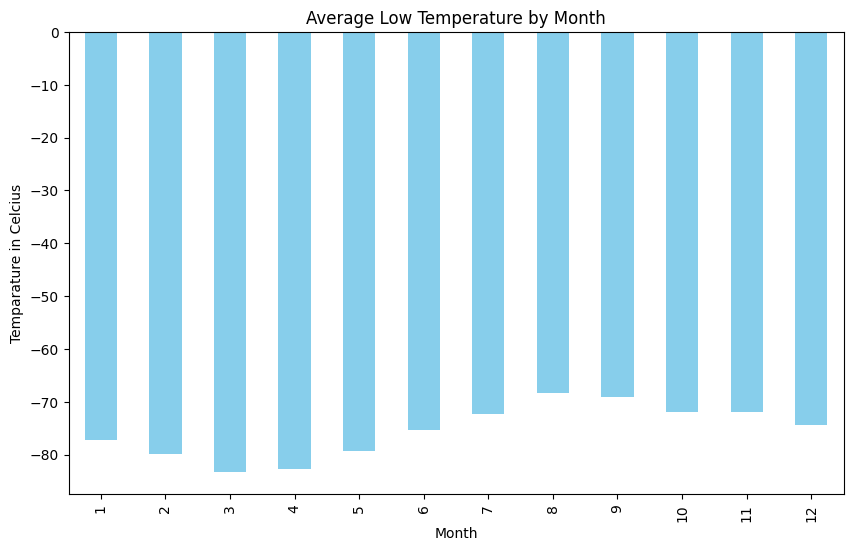

In [68]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temparature in Celcius')
plt.xticks(rotation=90)
plt.show()

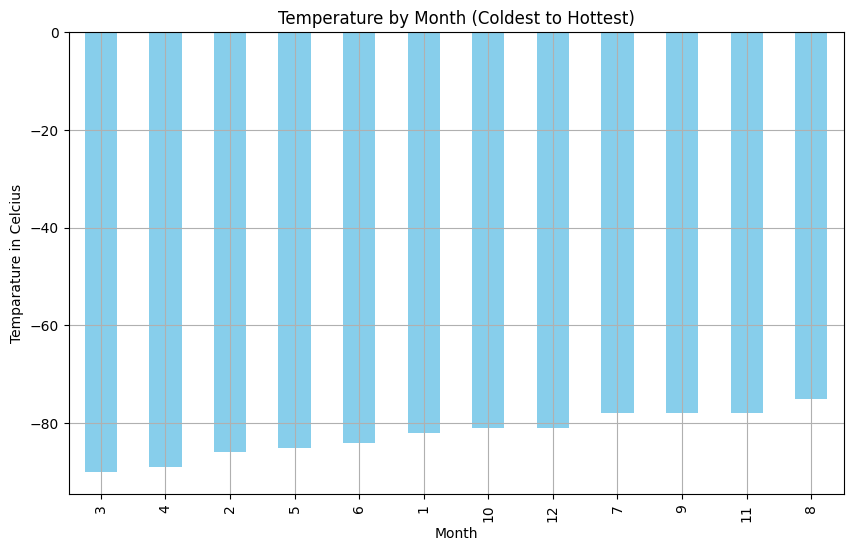

In [82]:
# Identify the coldest and hottest months in Curiosity's location

# Group by month and find the minimum min_temp for each month
min_temp_by_month = df.groupby('month')['min_temp'].min()

# Sort the data by minimum low temperature in ascending order
min_temp_by_month_sorted = min_temp_by_month.sort_values()

# Plot min_temp vs. month
plt.figure(figsize=(10, 6))
min_temp_by_month_sorted.plot(kind='bar', color='skyblue')
plt.title('Temperature by Month (Coldest to Hottest)')
plt.xlabel('Month')
plt.ylabel('Temparature in Celcius')
plt.xticks(rotation=90)  # Keep the month labels horizontal
plt.grid(True)
plt.show()

In [83]:
# 4. Average pressure by Martian month
# Group by 'month' and calculate the average pressure
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


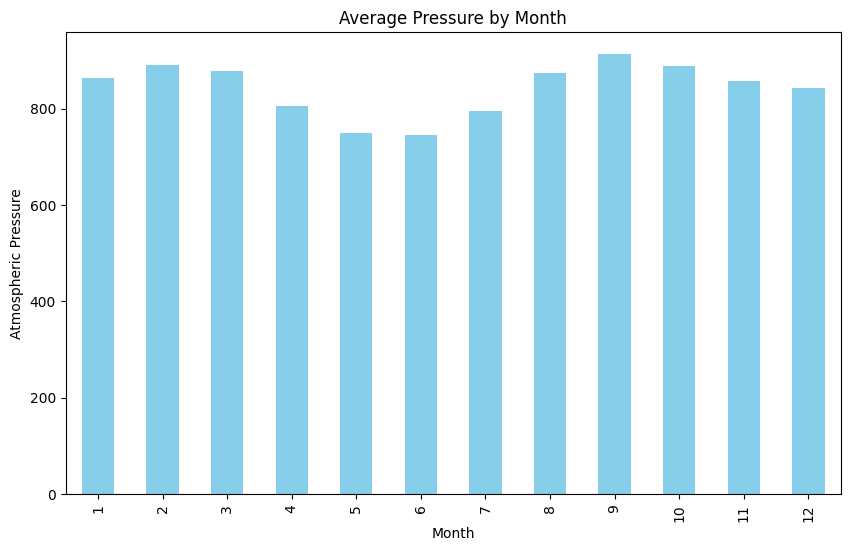

In [85]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=90)
plt.show()

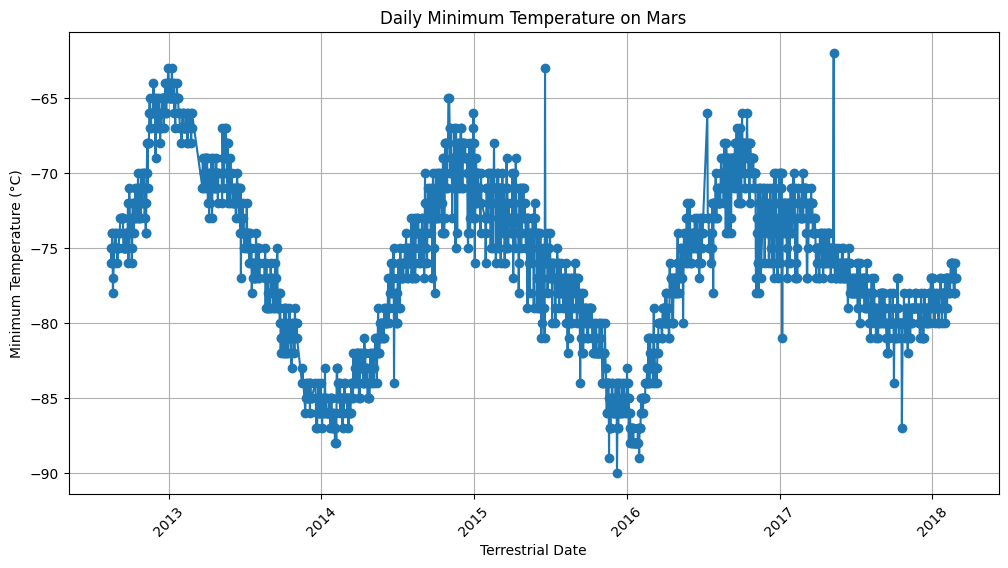

In [90]:
# 5. How many terrestrial (earth) days are there in a Martian year?
min_sol = df['sol'].min()
max_sol = df['sol'].max()

# Estimate the number of Earth days it takes for Mars to orbit the Sun once
# Known conversion rate: 1 Martian year = 687 Earth days (approximately)
earth_days_in_martian_year = (max_sol - min_sol + 1) * 687

# Visualize the daily minimum temperature
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [91]:
# Write the data to a CSV
df.to_csv("mars_weather_data.csv")

In [92]:
browser.quit()